## Final Project Submission

Please fill out:
* Student name: ANDREW WESTER
* Student pace: FULL TIME
* Scheduled project review date/time: FRIDAY, NOVEMBER 9, 2018
* Instructor name: RAFAEL CARRASCO


Write a Paragraph About OSEMiN Framework
# OSEMiN

**_OBTAIN_**
- For the obtain phase of the OSEMiN framework, I read in the 'kc_house_data.csv' data file as df, and examined the first 5 rows via df.head()
- After importing the data and examining the information, I started to look at possible pieces of the data that could be most beneficial in developing a possible hypothesis

**_SCRUB_**
- I started by recognizing the values that could be categorical, as well as values that had null information
- I recognized from seeing the heading, possible categorical values were bedrooms, bathrooms, floors, waterfront (boolean), view, condition, and grade.  While...
- Zipcode, latitude and longitude are all important for graphing on a map, but won't be likely needed to represent housing in this study
- For null values, I noticed from df.info() that waterfront, view, and yr_renovated each appeared to not have a full set of data that matched the number of rows each other column contained
- Upon further examination, I found that all three contained null values.
- As well as null values and categorical data, I noticed that the sqft_basement column was listed as an object, and upon re-examining the column, the datapoints are all numbers, and should be reflected as such by changing the dtype from object to float, so that operations could be performed on the column if necessary.

**_EXPLORE_**
- I started the explore step by graphing each of the columns to examine the relationships.  This confirmed my theory that bedrooms, bathrooms, floors, waterfront(boolean), view, condition, and grade could all be categorical values
- In thinking about it reasonably, bedrooms, bathrooms, floors, all were likely not a true categorical variable, since it was just that there wasn't much option for continuous data.  However, view, condition, and grade were all likely true categorical values, as view I found online represented the number of times the house had been viewed prior to purchase, condition was a representation of the quality of the house based on its age and grade.  Grade was rated on a scale of 1-13 and was based on building quality and materials, and the construction quality and materials among other things.  Finally, waterfront was also a categorical boolean value as the only values were 0 or 1, meaning it was a true/false column.

- As I continued through with the explore step, I gravitated towards two main points of emphasis: grade and total square feet.
    - For Grade, I recognized that there was a pattern behind the houses selling with a grade of above 8 and higher, as well as those with a grade of 7 or lower.  From this I began examining further the effects of the grade, and noticed that a similar effect on housing price that was created by the grade of the house was also created by total square footage of a house, but not with a strong enough correlation to have collinearity.
    - I decided for square feet of a house that it was difficult to establish whether having a basement would be a factor on housing price, and I did not want to throw out the data of sqft_basement, so I decided to combine the basement and living room square footage and create a new column called sqft_total measuring total square feet combined between the two.  This new column also appeared to have some significance in effecting the price of houses sold, so I chose to examine this as well.
- Before modeling my data, I wanted to confirm my theory, and split my data twice.  One split of data to create a new dataframe that was separated by total square feet of greater than 2,400 square feet, and another one that was houses with 2,400 or less square feet.  I graphed these data points relative to price, and also checked the effect that grade seemed to have on these houses.
- After splitting and confirming that square footage was effective, I repeated the process, but this time split by grade of 8 or higher and grade below 8.  I repeated my process from the split by total square feet, and again confirmed that I was on the right track with my data.

**_MODEL_**
- After looking at my two predictors of Total Square Feet, and Building Grade, I started modeling my data.  The building grade data was already normal, so I log normalized my total square feet data, and then scaled my square feet data by mean normalization, and split my building grade data into dummies for the grades.  I created my formula and modeled the data, which returned an R-square score of 0.565, and a confidence of 100% on every predictor except for Grade 3 and Grade 10, which cannot be removed from the data set as it is a dummy.  
- I then ran a train-test split and returned for my test data a Linear Regression Score:  0.5522988234858908.
- I also ran a train and test MSE and RMSE Test and returned the following:
    - Train Mean Squarred Error: 57653298281.62984
    - Test Mean Squarred Error: 63233832741.191124
    - Train RMSE:  240111.01241223785
    - Test RMSE:  251463.38250566646
- These results confirm the fit from the train to test data, and while the R-squared score isn't as high as we would otherwise prefer, this appears to be an accurate model comparing Building Grade with Total Square Feet to Housing Price.

**_INTERPRET_**
- All of the above data has been compiled into a presentation for stakeholders in this project.  The largest points of emphasis are as follows:
    - Building Grade and Total Square Feet are two of the most important factors affecting housing prices in King County Washington from 2013-2014.
    - We found that(as shown in graphs and calculations throughout and at the end of this notebook) houses with more than 2,400 total square feet(a round number chosen close to the average square footage) were sold for 1.84 times the price of houses with 2,400 or less square feet.
    - Similarly, homes receiving a grade of 8 or above were priced at 1.87 times that of houses with a grade below 8.
- These two factors appear to have the highest impact on housing prices, while also not being directly correlated with each other.  Eliminating this multicollinearity was important to show that the two factors did not affect each other and were both similarly affected housing prices, while remaining independent of each other.

- Recommendations for stakeholders are as follows:
    - If looking at renovations for a property, the most important parts will be to improve the building grade, which have to do with the quality of materials and the quality of construction.  Aiming for high end appliances and upgrades will be most helpful to improve building grade and the chance of increasing value of the house.
    
    - For those looking at purchasing a new property, if it is a renovation property, see the above recommendations.  However, if a purchase of a property is for long term value or investment, then houses with land to expand their house, or with room for improvements, the value of the house can be increased over time.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [2]:
# Import and preview housing data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Look at housing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# First Things I Notice:
- The column sqft_basement is listed as an object (string), and likely should be a numeric value.  Will be able to confirm from descriptive statistics
- It also seems that waterfront, view, and yr_renovated don't have the full dataset, which indicates there are likely null values in each column

In [4]:
# Check for null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- We confirm that there are three columns with null values, Waterfront, View, and Year Renovated

In [5]:
# Look at descriptive information of housing data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Observations:
- It appears that bedrooms, bathrooms, floors, waterfront (boolean), view, condition, grade, can all be considered categorical data
- Zipcode, latitude and longitude are all important for graphing on a map, but won't be likely needed to represent housing in this study

In [6]:
# Change sqft_basement '?' values to '0.0' in order to...
df['sqft_basement'] = df['sqft_basement'].replace('?','0.0')
# ... Change sqft_basement type from object to np.float64, check success via .info()
df['sqft_basement'] = df['sqft_basement'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [7]:
# Create column sqft_total to examine the combined square feet between basement and living room
df['sqft_total'] = df.sqft_basement + df.sqft_living

In [8]:
# Change yr_renovated null values to 0, check success via .unique()
df.yr_renovated.fillna(0., inplace=True)
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

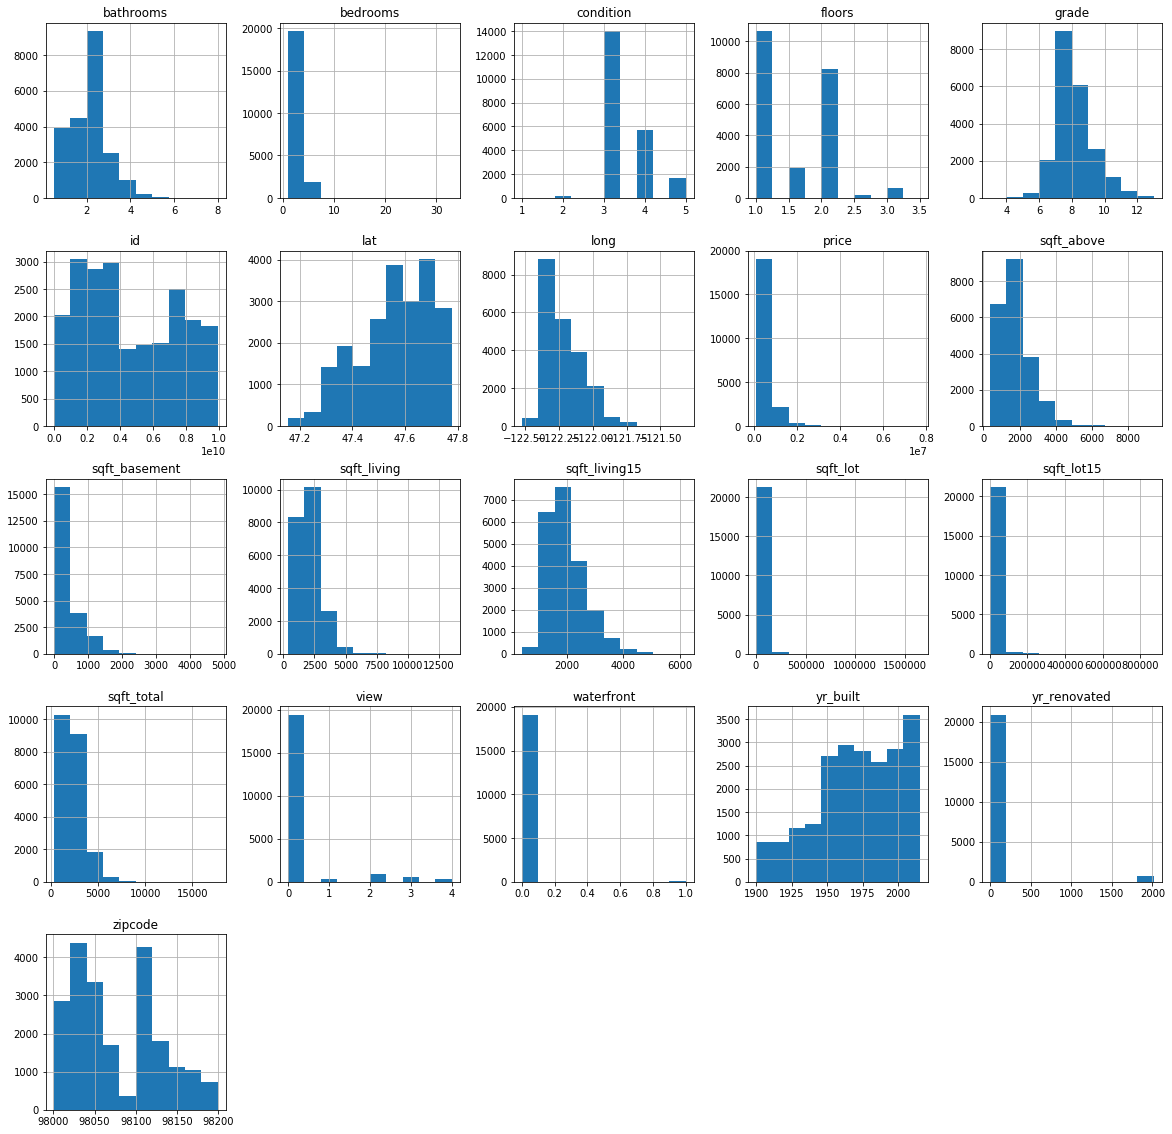

In [9]:
# Plot histogram of each column to see layout of each piece of data
df.hist(figsize =(20,20));

# Notes

- After removing null values and changing basement square feet column to a float, the DataFrame is graphed to look at the differences in each column and how each relates to number of houses sold.
- From plotting histograms for each column in our DataFrame, we can see and confirm that the columns we originally thought were categorical variables were indeed.  Condition, floors, view, and waterfront are all categorical variables, and waterfront appears to be a Boolean (True/False) category.
- We can see from our data that there is skewness in the following data: Bedrooms, Bathrooms, Latitude, Longitude, Price, Year Built, and each Square Foot Category

# Explore DATA

- First off, set the price column as it's own variable so we can use it later when modeling our data.
- We can check the descriptive statistics to learn more about pricing of houses

In [10]:
price = df.price
price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

# Examine Total Square Feet
- Plot a histogram to see the distribution of houses sold based on total square footage

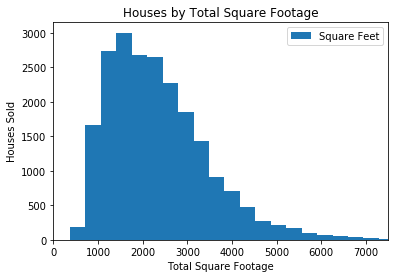

In [11]:
# Start examining total square feet per house, limit x values to 7500 for visual clarity 
x = df.sqft_total
plt.hist(x, bins=50, align='mid', label='Square Feet')
plt.xlim(0,7500)
plt.locator_params(axis='x', nbins=12)
plt.xlabel('Total Square Footage')
plt.ylabel('Houses Sold')
plt.legend()
plt.title('Houses by Total Square Footage');

- The histogram above gives us an idea of the dispersion amongst houses sold and what the majority of total square footage was for each house sold.  From the histogram, it appears the most houses sold had somewhere in the 1500-2500 square foot range.

- We can confirm this by looking at the descriptive statistics of the total square feet column in order to see the mean, median, max, and min values.

In [12]:
# Examine data for total square feet columm
df.sqft_total.describe()

count    21597.000000
mean      2366.038431
std       1175.817847
min        370.000000
25%       1500.000000
50%       2160.000000
75%       2980.000000
max      17670.000000
Name: sqft_total, dtype: float64

We confirm that the mean total square feet of houses sold is 2,366 feet, with one standard deviation in either direction bringing the value to:

-1 Deviation = 1,191 sqft,

-2 Deviation = 16 sqft,

+1 Deviation = 3,541 sqft,

+2 Deviation = 4,716 sqft,

+3 Deviation = 5,891 sqft

# Graph Total Square Feet
- We have plotted a histogram to see the number of houses sold, but now let's look at the relationship between the Total Square Feet of houses and the price they sell for to give us an idea of the relationship.

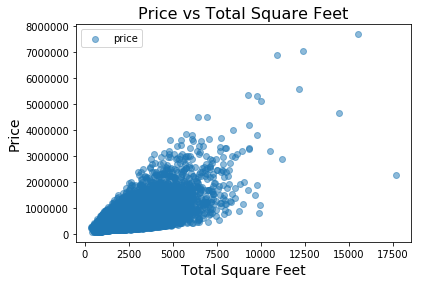

In [13]:
x = df.sqft_total
y = df.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price vs Total Square Feet', fontsize=16)
plt.legend()
plt.show()

# As we can see:
- There appears to be a consistent relationship between the total square feet of the houses sold, and the price that they sold for.  By Examining this further, we can get a better understanding of the housing market in King County, Washington.

# Question 1: If we Split our Data by Square Feet, What does this show?
- Let's look at our theory that house sales have to do with total square feet.  We will start by splitting our data into two halves along the approximate median square foot value, one with square feet more than 2,150, and another with square feet of 2,150 or less.  After splitting our values along this line, we can examine if there is still a consistent effect on housing price based on square footage, and perhaps is less effected by the grade of the house.

In [14]:
over_2150 = df.loc[df['sqft_total'] > 2150]
below_2150 = df.loc[df['sqft_total'] < 2151]

# Check length of each new dataframe to confirm not too large of a sample size in either category
print(len(over_2150))
print(len(below_2150))

10876
10721


# Graph the Values:
- Now that we split the data, and we checked that the two samples sizes are close to the same size, we can start graphing to see the difference in square feet and price

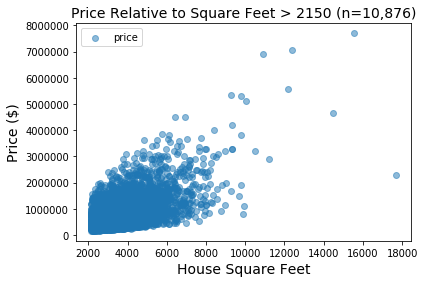

In [15]:
# Graph the distribution of housing square feet relative to price to see relationship
m = over_2150.sqft_total
n = over_2150.price
plt.scatter(m, n, alpha=0.5)
plt.xlabel('House Square Feet', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Price Relative to Square Feet > 2150 (n=10,876)', fontsize=14)
plt.legend(loc=2);

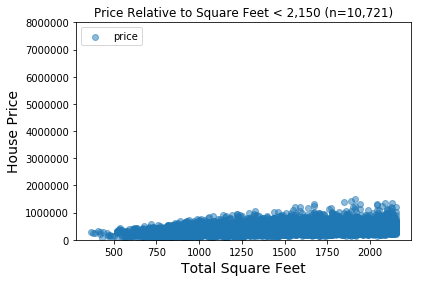

In [16]:
# Change scale of y axis to represent same scale as the prior graph
o = below_2150.sqft_total
p = below_2150.price
plt.scatter(o, p, alpha=0.5)
plt.ylim(0,8000000)
plt.title('Price Relative to Square Feet < 2,150 (n=10,721)')
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.legend(loc=2)
plt.show();

In [17]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

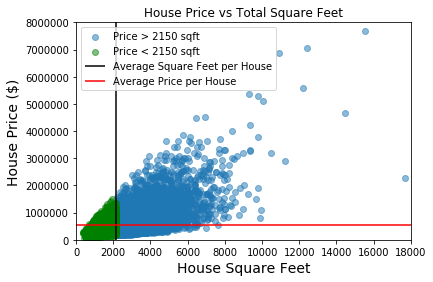

In [18]:
plt.scatter(m, n, alpha=0.5, label='Price > 2150 sqft')
plt.scatter(o, p, alpha=0.5, label='Price < 2150 sqft', c='green')
plt.xlabel('House Square Feet', fontsize=14)
plt.xlim(0, 18000)
plt.ylabel('House Price ($)', fontsize=14)
plt.ylim(0, 8000000)
plt.title('House Price vs Total Square Feet')
plt.vlines(2150, 0, 8000000, color='k', label='Average Square Feet per House')
plt.hlines(540296, 0, 18000, color='r', label='Average Price per House')
plt.legend(loc=2)
plt.show()

## Answer 1: Graphical Evidence Shows Strength of Relationship for SqFt vs Price
- From graphing our values of total square feet over and under our median value of 2,150 square feet, we can see that there is a strong relationship on our graphs between the square footage and the price of the house.  While there are still other factors to examine, we are able to show graphically the effect of the total square footage of a house.
- In our final graph above, we draw a vertical line at our median to show the difference for those houses above and below our median value.

# Grade?
- Now that we have seen there is clearly a relationship between the price of the house sold and the total square feet, let's look to see if there is a similar relationship between the price of the house sold and the grade of the house.

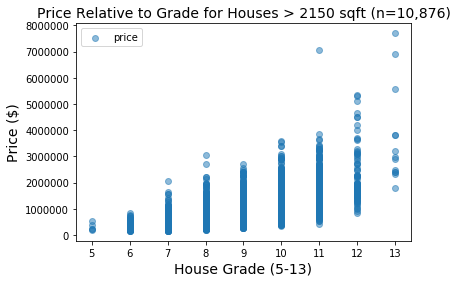

In [19]:
# Graph price vs grade for houses over 2150 sqft
x = over_2150.grade
y = over_2150.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('House Grade (5-13)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Price Relative to Grade for Houses > 2150 sqft (n=10,876)', fontsize=14)
plt.legend(loc=2);

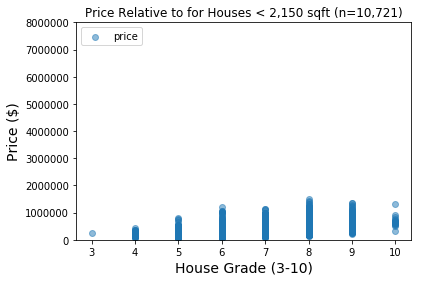

In [20]:
# Graph price vs grade for houses over 2150 sqft
# Change y axis scale to match prior graph
x = below_2150.grade
y = below_2150.price
plt.scatter(x, y, alpha=0.5)
plt.title('Price Relative to for Houses < 2,150 sqft (n=10,721)')
plt.xlabel('House Grade (3-10)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.ylim(0,8000000)
plt.legend(loc=2)
plt.show();

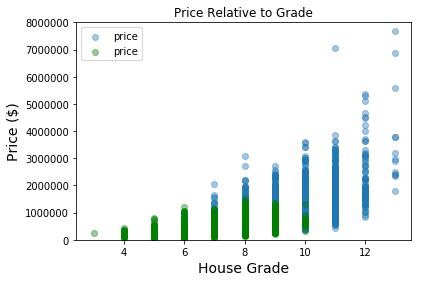

In [21]:
plt.scatter(over_2150.grade, over_2150.price, alpha=0.4)
plt.scatter(below_2150.grade, below_2150.price, alpha=0.4, color='green')
plt.title('Price Relative to Grade')
plt.xlabel('House Grade', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.ylim(0,8000000)
plt.legend(loc=2)
plt.show();

# Question 2: Collinearity between Total SqFt and Grade?
- There definitely appears to be a relationship between Housing Grade and the price of the home, as well as a relationship between square footage and price of the home.  We need to test for collinearity to make sure they don't overlap with each other.
- The next steps will be to drop all other columns from the data except for price, grade, and total square feet.  Dropping these other columns allows us to examine grade and total square feet next to each other, and eliminate all other influences on our data.
- After dropping those columns, we look for correlation between grade and total square feet.  If there is a high amount of correlation between grade and total square feet, we could consider these predictors to have collinearity, which would mean that we would need to choose only one of the two to use for predictors in our model.

In [22]:
# Create new df for analysis and drop all columns from new df except for price, grade, sqft_total
over_2150a = over_2150.drop(columns=['id', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                                    'zipcode', 'lat', 'long', 'sqft_living15',
                                     'sqft_lot15', 'bedrooms', 'bathrooms'], axis=1)

In [23]:
# Create new df for analysis and drop all columns for new df except for price, grade, sqft_total
below_2150a = below_2150.drop(columns=['id', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                                    'zipcode', 'lat', 'long', 'sqft_living15',
                                       'sqft_lot15', 'bedrooms', 'bathrooms'], axis=1)

               price     grade  sqft_total
price       1.000000  0.633872    0.618833
grade       0.633872  1.000000    0.498515
sqft_total  0.618833  0.498515    1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


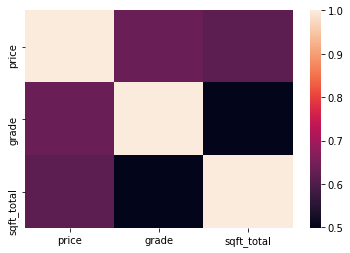

In [24]:
# Examine correlation via heatmap of price, grade, and total square feet for houses with more than 2400 sqft
print(over_2150a.corr());
print(sns.heatmap(over_2150a.corr()));

               price     grade  sqft_total
price       1.000000  0.444814    0.338260
grade       0.444814  1.000000    0.508436
sqft_total  0.338260  0.508436    1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


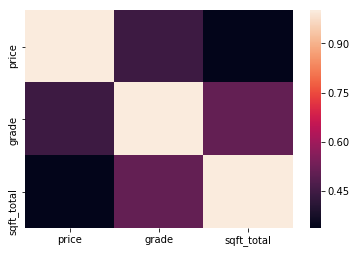

In [25]:
print(below_2150a.corr());
print(sns.heatmap(below_2150a.corr()));

## Answer 2: No Collinearity between Total SqFt and Grade
- In houses with square feet over 2,150, there is definitely some correlation between square feet and price, as well as grade and price, both of which we had already seen from graphing.  However, there does not appear to be any strength of relationship between grade and total square feet, meaning we can likely eliminate multicolinnearity and look at the two factors as both being relational with price.  This helps us because we can use both of these factors as predictors in our model.
- In houses with square feet less than 2,150, it appears that our results are similar to houses over 2,150 square feet, but not exactly the same. It would appear that we have less correlation with total square feet and price in this group of data, whereas grade and price appears to have some more correlation.  Relative to each other, total square feet and grade don't have an incredibly strong correlation, but a bit stronger than in houses over 2,150 square feet.
- From examining the houses over and under 2,150 square feet for correlation with grade and price, we are able to eliminate multicollinearity from our possibilities list and move forward with the assumption that we will use both of these two variables as predictors in our model.

## Switch from Looking at Square Feet OVER/UNDER 2,150 TO:
#### Start examining grade of houses OVER/UNDER 
- HOW does this effect our data??

Text(0.5, 1.0, 'Houses Sold by Grade')

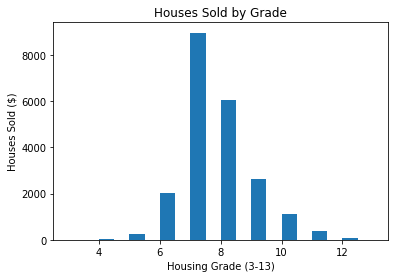

In [26]:
# Move on to examining grade per house, 
plt.hist(x=df.grade, bins=20, align='mid')
plt.xlabel('Housing Grade (3-13)')
plt.ylabel('Houses Sold ($)')
plt.title('Houses Sold by Grade')

In [27]:
df.grade.describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [28]:
# Split df by grade, less than 8 and greater than or equal to 8
eight_plus = df.loc[df["grade"]>7.5]
eight_minus = df.loc[df["grade"]<7.5]
print(len(eight_plus))
print(len(eight_minus))

10315
11282


In [29]:
eight_plus.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
count,1.031500e+04,1.031500e+04,10315.000000,10315.000000,10315.000000,1.031500e+04,10315.00000,9199.000000,10285.000000,10315.000000,...,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000
mean,4.671037e+09,7.149265e+05,3.637130,2.563694,2625.471352,1.827020e+04,1.75269,0.012067,0.380749,3.311779,...,2284.432477,333.825691,1983.990596,75.617838,98069.114881,47.572841,-122.188451,2387.621328,14886.086767,2959.297043
std,2.911293e+09,4.445661e+05,0.843526,0.648786,940.580394,4.751856e+04,0.53391,0.109189,0.962592,0.576621,...,865.792236,503.739800,25.997151,381.491656,49.579127,0.129775,0.141764,708.828072,31259.400188,1233.735540
min,1.200019e+06,1.400000e+05,1.000000,0.500000,750.000000,6.000000e+02,1.00000,0.000000,0.000000,1.000000,...,630.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,460.000000,651.000000,750.000000
25%,2.141331e+09,4.500000e+05,3.000000,2.250000,1990.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,...,1625.000000,0.000000,1972.000000,0.000000,98029.000000,47.509000,-122.309000,1880.000000,5165.500000,2110.000000
50%,4.014400e+09,6.095000e+05,4.000000,2.500000,2490.000000,8.075000e+03,2.00000,0.000000,0.000000,3.000000,...,2160.000000,0.000000,1990.000000,0.000000,98058.000000,47.592400,-122.190000,2310.000000,8006.000000,2730.000000
75%,7.518503e+09,8.250000e+05,4.000000,2.750000,3100.000000,1.290250e+04,2.00000,0.000000,0.000000,4.000000,...,2780.000000,650.000000,2004.000000,0.000000,98108.000000,47.670900,-122.086000,2810.000000,11837.000000,3530.000000
max,9.895000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.074218e+06,3.50000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.402000,6210.000000,871200.000000,17670.000000


In [30]:
eight_minus.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
count,1.128200e+04,1.128200e+04,11282.000000,11282.000000,11282.000000,1.128200e+04,11282.000000,10022.000000,11249.000000,11282.000000,...,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000
mean,4.497674e+09,3.806345e+05,3.131892,1.706346,1581.898068,1.220039e+04,1.257667,0.003492,0.099564,3.499468,...,1335.260149,241.730987,1959.122230,62.486527,98086.031377,47.548438,-122.237325,1619.989807,10812.858004,1823.629055
std,2.842378e+09,1.558398e+05,0.932799,0.629363,533.492105,3.465688e+04,0.424147,0.058995,0.487257,0.699544,...,442.747536,366.421968,27.177206,347.211078,55.659753,0.145145,0.135628,397.547183,22864.291026,799.390676
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,659.000000,370.000000
25%,2.113700e+09,2.650000e+05,3.000000,1.000000,1200.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,...,1030.000000,0.000000,1943.000000,0.000000,98034.000000,47.445900,-122.338000,1340.000000,5080.000000,1220.000000
50%,3.867400e+09,3.500000e+05,3.000000,1.750000,1520.000000,7.350000e+03,1.000000,0.000000,0.000000,3.000000,...,1250.000000,0.000000,1959.000000,0.000000,98103.000000,47.549550,-122.282000,1570.000000,7450.000000,1640.000000
75%,7.214820e+09,4.620000e+05,4.000000,2.250000,1900.000000,9.600000e+03,1.500000,0.000000,0.000000,4.000000,...,1550.000000,490.000000,1978.000000,0.000000,98125.000000,47.682600,-122.171000,1840.000000,9256.750000,2290.000000
max,9.900000e+09,2.050000e+06,33.000000,7.500000,4480.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,...,4190.000000,2070.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4090.000000,425581.000000,6210.000000


In [31]:
avg_price_above = np.mean(eight_plus['price'])
avg_price_above

714926.4740668929

In [32]:
avg_price_below = np.mean(eight_minus['price'])
avg_price_below

380634.50788867223

- Graph data with hexbin plot to examine the effect of grade on housing price
- By adding the color bar on the right to reference sqft_total, we can see the distribution of sqft_total on the house price as well

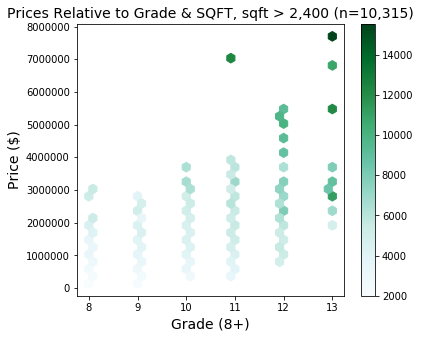

In [33]:
eight_plus.plot.hexbin(x='grade', y='price', C='sqft_total', gridsize=30, sharex=False, figsize=(6,5))
plt.xlabel('Grade (8+)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Prices Relative to Grade & SQFT, sqft > 2,400 (n=10,315)', fontsize=14);

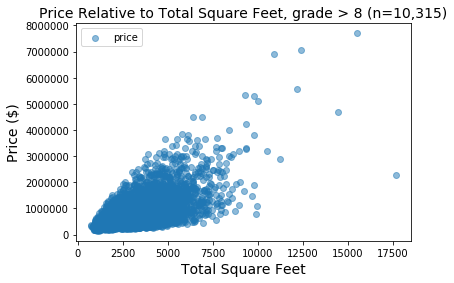

In [34]:
# Graph the distribution of square feet relative to price to see relationship
x = eight_plus.sqft_total
y = eight_plus.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Price Relative to Total Square Feet, grade > 8 (n=10,315)', fontsize=14)
plt.legend(loc=2);

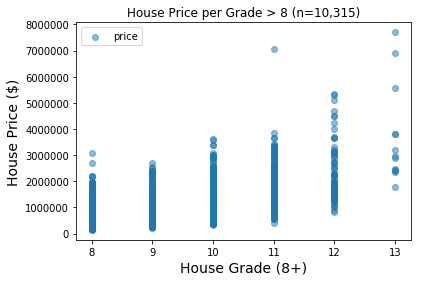

In [35]:
# Graph the distribution of grade>8 relative to price to see relationship
x = eight_plus.grade
y = eight_plus.price
plt.scatter(x, y, alpha=0.5)
plt.title('House Price per Grade > 8 (n=10,315)')
plt.xlabel('House Grade (8+)', fontsize=14)
plt.ylabel('House Price ($)', fontsize=14)
plt.legend(loc=2)
plt.show();

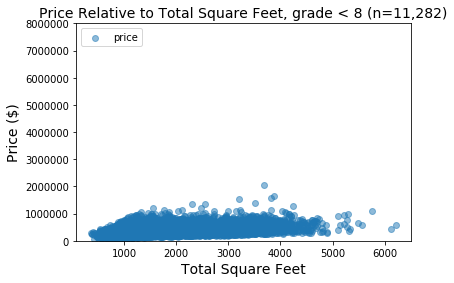

In [36]:
# Graph the distribution of square feet relative to price to see relationship
# Set y scale equal to that of grade >8 to show relative difference in price of houses
x = eight_minus.sqft_total
y = eight_minus.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Price Relative to Total Square Feet, grade < 8 (n=11,282)', fontsize=14)
plt.ylim(0, 8000000)
plt.legend(loc=2);

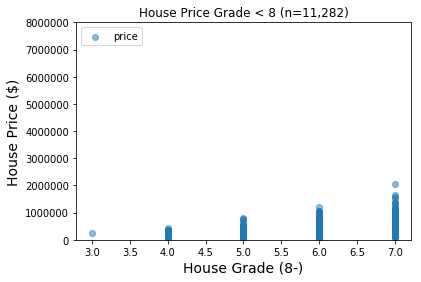

In [37]:
# Graph the distribution of grade<8 relative to price to see relationship
# Set y scale equal to that of grade >8 to show relative difference in price of houses
x = eight_minus.grade
y = eight_minus.price
plt.scatter(x, y, alpha=0.5)
plt.title('House Price Grade < 8 (n=11,282)')
plt.xlabel('House Grade (8-)', fontsize=14)
plt.ylabel('House Price ($)', fontsize=14)
plt.ylim(0,8000000)
plt.legend(loc=2)
plt.show();

In [38]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

# Time to Model Results with Full Dataset
Predictive Modeling on the Final Data (data_final) in order to examine the effects of total square feet and housing grade on price of a house.  This modeling allows us to look ahead and use our data to examine what effects these data points carry and how we can predict pricing of a house.

In [39]:
grade_dummies = pd.get_dummies(df['grade'], prefix="grade")
logsqft = np.log(df['sqft_total'])
price = df['price']
scaled_sqft = (logsqft-np.mean(logsqft))/(max(logsqft)-min(logsqft))
data_final = pd.DataFrame([])
data_final = pd.concat([price, scaled_sqft, grade_dummies], axis=1)
y = data_final[["price"]]
X = data_final.drop(["price"], axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
price         21597 non-null float64
sqft_total    21597 non-null float64
grade_3       21597 non-null uint8
grade_4       21597 non-null uint8
grade_5       21597 non-null uint8
grade_6       21597 non-null uint8
grade_7       21597 non-null uint8
grade_8       21597 non-null uint8
grade_9       21597 non-null uint8
grade_10      21597 non-null uint8
grade_11      21597 non-null uint8
grade_12      21597 non-null uint8
grade_13      21597 non-null uint8
dtypes: float64(2), uint8(11)
memory usage: 569.5 KB


In [40]:
print(len(data_final))
print(len(X))
print(len(y))

21597
21597
21597


In [41]:
print(data_final.head())
print(y.head())
print(X.head())

      price  sqft_total  grade_3  grade_4  grade_5  grade_6  grade_7  grade_8  \
0  221900.0   -0.150524        0        0        0        0        1        0   
1  538000.0    0.088229        0        0        0        0        1        0   
2  180000.0   -0.260939        0        0        0        1        0        0   
3  604000.0    0.079370        0        0        0        0        1        0   
4  510000.0   -0.059145        0        0        0        0        0        1   

   grade_9  grade_10  grade_11  grade_12  grade_13  
0        0         0         0         0         0  
1        0         0         0         0         0  
2        0         0         0         0         0  
3        0         0         0         0         0  
4        0         0         0         0         0  
      price
0  221900.0
1  538000.0
2  180000.0
3  604000.0
4  510000.0
   sqft_total  grade_3  grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  \
0   -0.150524        0        0        0   

In [42]:
f = "price ~ sqft_total+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13"
model = ols(formula=f, data=data_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     2549.
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:07:14   Log-Likelihood:            -2.9840e+05
No. Observations:               21597   AIC:                         5.968e+05
Df Residuals:                   21585   BIC:                         5.969e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.319e+05   2.15e+04     43.334      0.000     8.9e+05    9.74e+05
sqft_total  8.403e+05   1.78e+04     47.285      0.000    8.06e+05    8.75e+05
grade_3    -3.653e+05   2.22e+05     -1.643      0.100   -8.01e+05    7.06e+04
grade_4    -4.659e+05    4.8e+04     -9.705      0.000    -5.6e+05   -3.72e+05
grade_5    -5.087e+05   2.61e+04    -19.523      0.000    -5.6e+05   -4.58e+05
grade_6    -5.089e+05   2.22e+04    -22.907      0.000   -5.52e+05   -4.65e+05
grade_7    -4.972e+05   2.16e+04    -22.971      0.000    -5.4e+05   -4.55e+05
grade_8    -4.121e+05   2.17e+04    -18.996      0.000   -4.55e+05    -3.7e+05
grade_9    -2.372e+05    2.2e+04    -10.786      0.000    -2.8e+05   -1.94e+05
grade_10    1.456e+04   2.26e+04      0.643      0.520   -2.98e+04    5.89e+04
grade_11    3.904e+05   2.45e+04     15.959      0.000    3.42e+05    4.38e+05
grade_12    1.044e+06   3.22e+04     32.461      0.000    9.81e+05    1.11e+06
grade_13    2.478e+06   6.53e+04     37.939      0.000    2.35e+06    2.61e+06
==============================================================================
Omnibus:                    15824.854   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           848272.377
Skew:                           2.989   Prob(JB):                         0.00
Kurtosis:                      33.115   Cond. No.                     1.13e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Model Summary
Our model summary provides us information on the accuracy of our data, which allows us to determine whether we need to add or change predictors in our model.  Our summary provides us with an R-squared value of 0.565, which tells us that our model's accuracy is not perfect (which would be close to 1), but also isn't completely astray from our given data (value would be close to 0).  Another important point in our model summary is our p-value for each predictor, which effectively tells us how confident the prediction is in its accuracy to the data.  We can  see that our p-value is withing our confidence value of 0.05 or 95% confidence, except for two variables in grade_3 and grade_10.  Normally, we would remove any predictors that are not within our 0.05 confidence value, but because grade_3 and grade_10 are dummy variables for the categorical values of Grade, we cannot simply remove two of these values, and so we leave them as a part of our model.

In [43]:
from numpy.polynomial.polynomial import polyfit
f = df['sqft_total']
g = df['price']
b, m = polyfit(f, g, 1)

Slope =  208.76528163588486
Intercept =  46349.89404150598


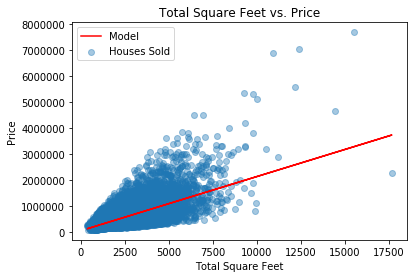

In [44]:
plt.scatter(f, g, alpha=0.4, label='Houses Sold')
plt.plot(f, b + m * f, '-', c='red', label='Model')
plt.title('Total Square Feet vs. Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.legend()
print("Slope = ", m)
print("Intercept = ", b)
plt.show();

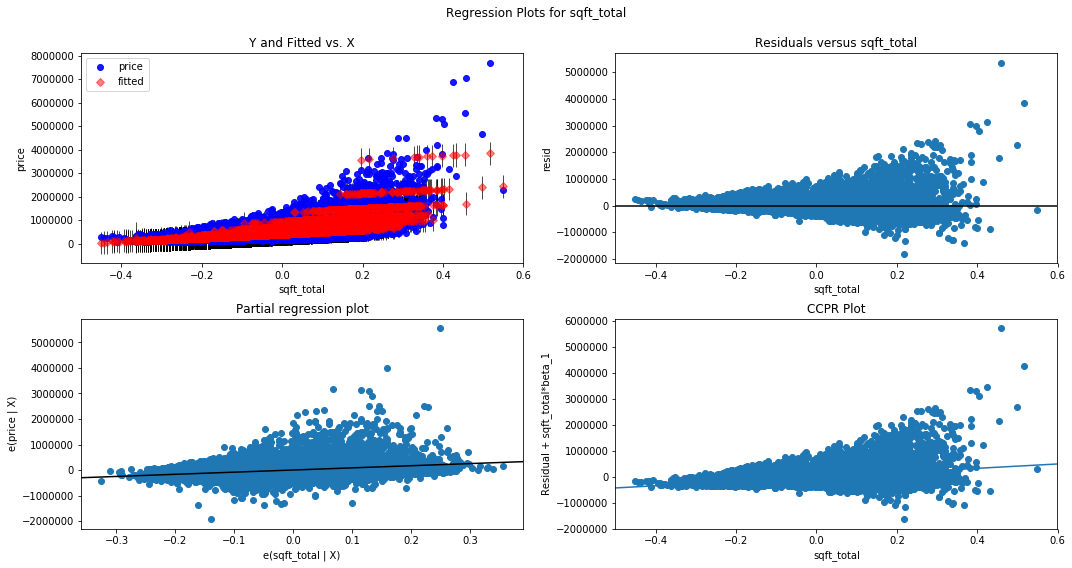

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_total", fig=fig)
plt.show()

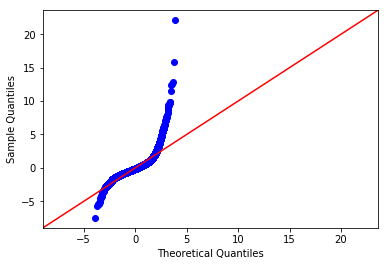

In [46]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [48]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

print('Linear Regression Score (R^2): ', linreg.score(X_test, y_test))

Linear Regression Score (R^2):  0.5728215231876279


In [49]:
# intercept
linreg.intercept_

array([977951.34065634])

In [50]:
# coefficients
linreg.coef_

array([[ 825269.56694409, -416809.23352058, -489514.74085866,
        -557763.64312096, -558759.27612915, -542750.78685955,
        -459079.36151965, -284824.60529254,  -32317.9704677 ,
         322088.28909334, 1072715.95902262, 1947015.36965283]])

# COEFFICIENTS
- From our model we receive coefficients for each variable in our prediction.  These values are intended to help up us assess our model in order to predict future values of houses.
- Of our coefficients, we have values for Total Square Feet, as well as for categorical variables for Grade 3-13.  We are given a P-Value for each coefficient, with every coefficient coming in at 0.0 (represents accurate data for the model), although we had two coefficients (grade_3 and grade_10) that had higher P-Values (0.100 and 0.520, respectively), but we are unable to remove these pieces of data from our model, as they are categorical.
- If we ignore the coefficients for grade_3 (-422,419.567), and for grade_10 (-39,116.063), we can then look at all the other coefficients.
- 
- We are left with the following:
        - Our Intercept: = 983,596.622
    - Total Square Feet, coefficient = 825,365.979
    - Grade_4, coefficient = -508,456.276
    - Grade_5, coefficient = -566,953.532
    - Grade_6, coefficient = -563,635.046
    - Grade_7, coefficient = -550,193.255
    - Grade_8, coefficient = -465,435.765
    - Grade_9, coefficient = -283,552.731
    - Grade_11, coefficient = 343,743.752
    - Grade_12, coefficient = 941,250.711
    - Grade_13, coefficient = 2,114,767.772

- From these coefficients, the biggest outliers are grade_13(too high) and grade_12(too high), which are both very high and had very few houses that were sold with grades that high.  Our most populated grades were 7, 8, 9, 6, and 10 (from most to least), so these are likely areas we need to examine further, as well as total square feet.
- All of our coefficients are either very high or very low, and none of them appear to be graphically well representing for correlation.  For instance, if we assume that our total square foot coefficient of 825,596 is accurate, then that alone with our intercept, for a house that is sold with 2,150 square feet(the average), would yield: Price = 825596*2150 + 983596 == 1,776,015,000, that is 1.776 BILLION which is clearly not right!
- The same equation could be used for any of our other coefficients, Grade_11 yields 740 MILLION, Grade_4 yields -1.09 BILLION, grade _5 is even worse, as is grade_6, grade_7, grade_8, and grade_9.  All in all, our results don't yield the answers we are looking for in this model.

In [51]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    5.756713e+10
dtype: float64
Test Mean Squarred Error: price    6.414782e+10
dtype: float64


In [52]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 57567125231.86361
Test Mean Squarred Error: 64147816080.12298


In [53]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print('Train RMSE: ', train_rmse)
print('Test RMSE: ', test_rmse)

Train RMSE:  239931.50112451598
Test RMSE:  253274.19150028488


In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-59235871188.23778
-59362538851.715675
-59349574850.38273


# $Some Extra Graphs$

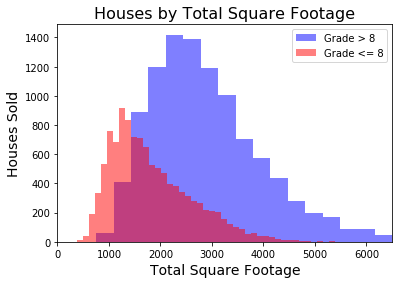

In [55]:
plus = eight_plus.sqft_total
minus = eight_minus.sqft_total
plt.hist(plus, alpha=0.5, bins=50, align='mid', label='Grade > 8', color='blue')
plt.hist(minus, alpha=0.5, bins=50, align='mid', label='Grade <= 8', color='red')
plt.xlim(0,6500)
plt.locator_params(axis='x', nbins=12)
plt.xlabel('Total Square Footage', fontsize=14)
plt.ylabel('Houses Sold', fontsize=14)
plt.legend()
plt.title('Houses by Total Square Footage', fontsize=16);

# Price vs. Square Feet (Discerned by Color for Grade)

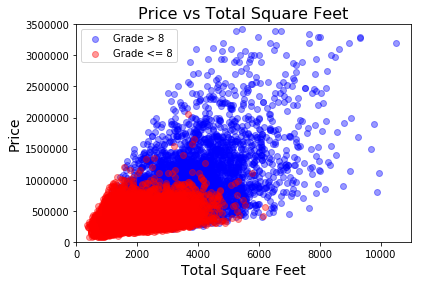

In [56]:
a = eight_plus.sqft_total
b = eight_plus.price
c = eight_minus.sqft_total
d = eight_minus.price
plt.scatter(a, b, alpha=0.4, c='blue', label='Grade > 8')
plt.scatter(c, d, alpha=0.4, c='red', label='Grade <= 8')
plt.xlabel('Total Square Feet', fontsize=14)
plt.xlim(0, 11000)
plt.ylabel('Price', fontsize=14)
plt.ylim(0, 3500000)
plt.title('Price vs Total Square Feet', fontsize=16)
plt.legend()
plt.show()

# Price vs. Square Feet > 2400 & Grade (Hexplot with Color Scale)

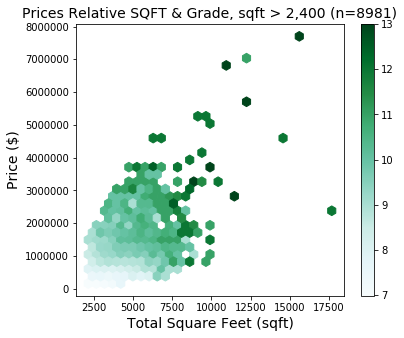

In [57]:
# Graph data with hexbin plot to examine the effect of total square feet on housing price
# By adding the color bar on the right to reference grade, we can see the distribution of grades on the house price as well
over_2150.plot.hexbin(x='sqft_total', y='price', C='grade', gridsize=30, sharex=False, figsize=(6,5))
plt.xlabel('Total Square Feet (sqft)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.title('Prices Relative SQFT & Grade, sqft > 2,400 (n=8981)', fontsize=14);

# Hexplot - $Price$ vs $Total SqFt$ & $Grade$

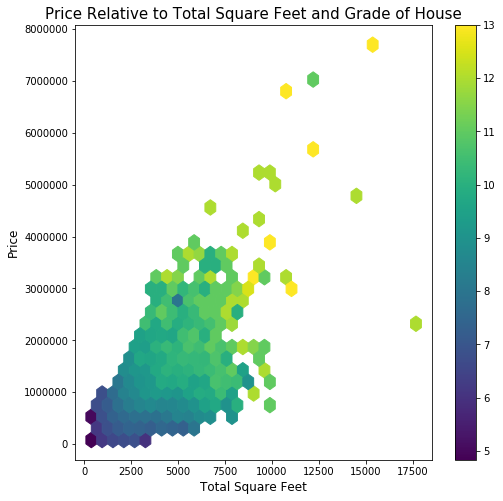

In [58]:
df.plot.hexbin(x='sqft_total', y='price', C='grade', gridsize=30, cmap="viridis", sharex=False, figsize=(8,8))
plt.title('Price Relative to Total Square Feet and Grade of House', fontsize=15)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Total Square Feet', fontsize=12)
plt.show()

# QUESTION 3: Does WaterFront Affect Prices?
- A final thought I wanted to examine at first but didn't due to the fact there are so few waterfront properties that sold is the following:
#### Would houses sold with a waterfront have a dramatically different price than those houses sold without a waterfront?

In [59]:
!pip install folium

    100% |████████████████████████████████| 92kB 2.2MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/63/36/1c93318e9653f4e414a2e0c3b98fc898b4970e939afeedeee6075dd3b703/branca-0.3.1-py3-none-any.whl


In [60]:
import folium

In [61]:
# over_2150 = df.loc[df['sqft_total'] > 2150]
locations = df.loc[df['waterfront'] == 1]
locations1 = df.loc[df['waterfront'] != 1]
water_locations = locations.drop(columns=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                                    'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
                                     'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'])
land_locations = locations1.drop(columns=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                                    'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
                                     'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'])
waterfront_locationlist = water_locations.values.tolist()
land_locationlist = land_locations.values.tolist()
print("Number of Homes Sold with Waterfront: ", len(waterfront_locationlist))
print("Number of Homes Sold without Waterfront: ", len(land_locationlist))
print("Average Price of Waterfront Homes: ${:0.2f}".format(locations.price.mean()))
print("Waterfront Properties:\n", locations.price.describe(), "\n")
print("Non-Waterfront Properties:\n", locations1.price.describe())

Number of Homes Sold with Waterfront:  146
Number of Homes Sold without Waterfront:  21451
Average Price of Waterfront Homes: $1717214.73
Waterfront Properties:
 count    1.460000e+02
mean     1.717215e+06
std      1.145385e+06
min      2.850000e+05
25%      8.275000e+05
50%      1.510000e+06
75%      2.282500e+06
max      7.060000e+06
Name: price, dtype: float64 

Non-Waterfront Properties:
 count    2.145100e+04
mean     5.322862e+05
std      3.428082e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64


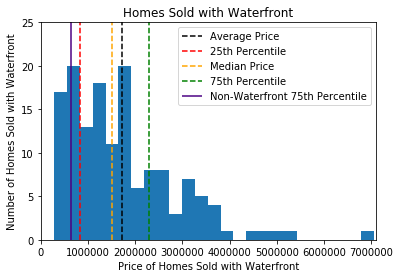

In [62]:
plt.hist(locations.price, bins=25, alpha=1)
plt.xlabel('Price of Homes Sold with Waterfront')
plt.ylabel('Number of Homes Sold with Waterfront')
plt.title('Homes Sold with Waterfront')
plt.ylim(0, 25)
plt.xlim(0,7100000)
plt.vlines(x=1717215, ymin=0, ymax=25, colors='black', linestyles='dashed', alpha=1, label='Average Price')
plt.vlines(x=827500, ymin=0, ymax=25, colors='red', linestyles='dashed', alpha=1, label="25th Percentile")
plt.vlines(x=1510000, ymin=0, ymax=25, colors='orange', linestyles='dashed', alpha=1, label="Median Price")
plt.vlines(x=2282500, ymin=0, ymax=25, colors='green', linestyles='dashed', alpha=1, label="75th Percentile")
plt.vlines(x=640000, ymin=0, ymax=25, colors='indigo', linestyles='solid', alpha=1, label='Non-Waterfront 75th Percentile')
plt.legend()

In [63]:
lat = df.lat
long = df.long

In [64]:
map=folium.Map(location=[lat.mean(),long.mean()],zoom_start=10,tiles='Stamen Terrain')
for point in range(0, len(waterfront_locationlist)):
    folium.Marker(waterfront_locationlist[point]).add_to(map)
map

In [65]:
locations1.zipcode.value_counts()
zips = pd.DataFrame(locations1.zipcode.value_counts().reset_index())
zips.columns = ['zipcode', 'count']

In [66]:
zips[:20]

,zipcode,count
0,98103,602
1,98038,589
2,98115,582
3,98052,571
4,98117,553
5,98042,547
6,98034,540
7,98118,504
8,98023,496
9,98006,494


In [67]:
zipcodes = []
for zip in zips.zipcode[:20]:
    zipcodes.append(zip)
print(zipcodes)

[98103, 98038, 98115, 98052, 98117, 98042, 98034, 98118, 98023, 98006, 98133, 98059, 98058, 98155, 98074, 98033, 98027, 98056, 98125, 98053]


In [68]:
marks = []
average = []
list_98103 = (df.loc[df['zipcode'] == 98103])
avg_98103 = list_98103.price.mean()
list_98103_mark = ([list_98103.lat, list_98103.long])
mark1 = folium.Marker([list_98103_mark[0].mean(), list_98103_mark[1].mean()], popup = "Zipcode: 98103, 602 Houses Sold, Average Price = ${:0.2f}".format(avg_98103)).add_to(map)
marks.append(mark1)
average.append(avg_98103)
                      
list_98038 = (df.loc[df['zipcode'] == 98038])
avg_98038 = list_98038.price.mean()
list_98038_mark = ([list_98038.lat, list_98038.long])
mark2 = folium.Marker([list_98038_mark[0].mean(), list_98038_mark[1].mean()], popup = "Zipcode: 98038, 589 Houses Sold, Average Price = ${:0.2f}".format(avg_98038)).add_to(map)
marks.append(mark2)
average.append(avg_98038)
                      
list_98115 = (df.loc[df['zipcode'] == 98115])
avg_98115 = list_98115.price.mean()
list_98115_mark = ([list_98115.lat, list_98115.long])
mark3 = folium.Marker([list_98115_mark[0].mean(), list_98115_mark[1].mean()], popup = "Zipcode: 98115, 582 Houses Sold, Average Price = ${:0.2f}".format(avg_98115)).add_to(map)
marks.append(mark3)
average.append(avg_98115)
                      
list_98052 = (df.loc[df['zipcode'] == 98052])
avg_98052 = list_98052.price.mean()
list_98052_mark = ([list_98052.lat, list_98052.long])
mark4 = folium.Marker([list_98052_mark[0].mean(), list_98052_mark[1].mean()], popup = "Zipcode: 98052, 571 Houses Sold, Average Price = ${:0.2f}".format(avg_98052)).add_to(map)
marks.append(mark4)
average.append(avg_98052)
                      
list_98117 = (df.loc[df['zipcode'] == 98117])
avg_98117 = list_98117.price.mean()
list_98117_mark = ([list_98117.lat, list_98117.long])
mark5 = folium.Marker([list_98117_mark[0].mean(), list_98117_mark[1].mean()], popup = "Zipcode: 98117, 553 Houses Sold, Average Price = ${:0.2f}".format(avg_98117)).add_to(map)
marks.append(mark5)
average.append(avg_98117)
                      
list_98042 = (df.loc[df['zipcode'] == 98042])
avg_98042 = list_98042.price.mean()
list_98042_mark = ([list_98042.lat, list_98042.long])
mark6 = folium.Marker([list_98042_mark[0].mean(), list_98042_mark[1].mean()], popup = "Zipcode: 98042, 547 Houses Sold, Average Price = ${:0.2f}".format(avg_98042)).add_to(map)
marks.append(mark6)
average.append(avg_98042)
                      
list_98034 = (df.loc[df['zipcode'] == 98034])
avg_98034 = list_98034.price.mean()
list_98034_mark = ([list_98034.lat, list_98034.long])
mark7 = folium.Marker([list_98034_mark[0].mean(), list_98034_mark[1].mean()], popup = "Zipcode: 98034, 540 Houses Sold, Average Price = ${:0.2f}".format(avg_98034)).add_to(map)
marks.append(mark7)
average.append(avg_98034)
                      
list_98118 = (df.loc[df['zipcode'] == 98118])
avg_98118 = list_98118.price.mean()
list_98118_mark = ([list_98118.lat, list_98118.long])
mark8 = folium.Marker([list_98118_mark[0].mean(), list_98118_mark[1].mean()], popup = "Zipcode: 98118, 504 Houses Sold, Average Price = ${:0.2f}".format(avg_98118)).add_to(map)
marks.append(mark8)
average.append(avg_98118)

list_98023 = (df.loc[df['zipcode'] == 98023])
avg_98023 = list_98023.price.mean()
list_98023_mark = ([list_98023.lat, list_98023.long])
mark9 = folium.Marker([list_98023_mark[0].mean(), list_98023_mark[1].mean()], popup = "Zipcode: 98023, 496 Houses Sold, Average Price = ${:0.2f}".format(avg_98023)).add_to(map)
marks.append(mark9)
average.append(avg_98023)
                      
list_98006 = (df.loc[df['zipcode'] == 98006])
avg_98006 = list_98006.price.mean()
list_98006_mark = ([list_98006.lat, list_98006.long])
mark10 = folium.Marker([list_98006_mark[0].mean(), list_98006_mark[1].mean()], popup = "Zipcode: 98006, 494 Houses Sold, Average Price = ${:0.2f}".format(avg_98006)).add_to(map)
marks.append(mark10)
average.append(avg_98006)
                       
list_98133 = (df.loc[df['zipcode'] == 98133])
avg_98133 = list_98133.price.mean()
list_98133_mark = ([list_98133.lat, list_98133.long])
mark11 = folium.Marker([list_98133_mark[0].mean(), list_98133_mark[1].mean()], popup = "Zipcode: 98133, 493 Houses SOld, Average Price = ${:0.2f}".format(avg_98133)).add_to(map)
marks.append(mark11)
average.append(avg_98133)
                       
list_98059 = (df.loc[df['zipcode'] == 98059])
avg_98059 = list_98059.price.mean()
list_98059_mark = ([list_98059.lat, list_98059.long])
mark12 = folium.Marker([list_98059_mark[0].mean(), list_98059_mark[1].mean()], popup = "Zipcode: 98059, 468 Houses Sold, Average Price = ${:0.2f}".format(avg_98059)).add_to(map)
marks.append(mark12)
average.append(avg_98059)
                       
list_98058 = (df.loc[df['zipcode'] == 98058])
avg_98058 = list_98058.price.mean()
list_98058_mark = ([list_98058.lat, list_98058.long])
mark13 = folium.Marker([list_98058_mark[0].mean(), list_98058_mark[1].mean()], popup = "Zipcode: 98058, 455 Houses Sold, Average Price = ${:0.2f}".format(avg_98058)).add_to(map)
marks.append(mark13)
average.append(avg_98058)
                       
list_98155 = (df.loc[df['zipcode'] == 98155])
avg_98155 = list_98155.price.mean()
list_98155_mark = ([list_98155.lat, list_98155.long])
mark14 = folium.Marker([list_98155_mark[0].mean(), list_98155_mark[1].mean()], popup = "Zipcode: 98155, 441 Houses Sold, Average Price = ${:0.2f}".format(avg_98155)).add_to(map)
marks.append(mark14)
average.append(avg_98155)
                       
list_98074 = (df.loc[df['zipcode'] == 98074])
avg_98074 = list_98074.price.mean()
list_98074_mark = ([list_98074.lat, list_98074.long])
mark15 = folium.Marker([list_98074_mark[0].mean(), list_98074_mark[1].mean()], popup = "Zipcode: 98074, 435 Houses Sold, Average Price = ${:0.2f}".format(avg_98074)).add_to(map)
marks.append(mark15)
average.append(avg_98074)
                       
list_98033 = (df.loc[df['zipcode'] == 98033])
avg_98033 = list_98033.price.mean()
list_98033_mark = ([list_98033.lat, list_98033.long])
mark16 = folium.Marker([list_98033_mark[0].mean(), list_98033_mark[1].mean()], popup = "Zipcode: 98033, 429 Houses Sold, Average Price = ${:0.2f}".format(avg_98033)).add_to(map)
marks.append(mark16)
average.append(avg_98033)
                       
list_98027 = (df.loc[df['zipcode'] == 98027])
avg_98027 = list_98027.price.mean()
list_98027_mark = ([list_98027.lat, list_98027.long])
mark17 = folium.Marker([list_98027_mark[0].mean(), list_98027_mark[1].mean()], popup = "Zipcode: 98027, 410 Houses Sold, Average Price = ${:0.2f}".format(avg_98027)).add_to(map)
marks.append(mark17)
average.append(avg_98027)
                       
list_98056 = (df.loc[df['zipcode'] == 98056])
avg_98056 = list_98056.price.mean()
list_98056_mark = ([list_98056.lat, list_98056.long])
mark18 = folium.Marker([list_98056_mark[0].mean(), list_98056_mark[1].mean()], popup = "Zipcode: 98056, 403 Houses Sold, Average Price = ${:0.2f}".format(avg_98056)).add_to(map)
marks.append(mark18)
average.append(avg_98056)
                       
list_98125 = (df.loc[df['zipcode'] == 98125])
avg_98125 = list_98125.price.mean()
list_98125_mark = ([list_98125.lat, list_98125.long])
mark19 = folium.Marker([list_98125_mark[0].mean(), list_98125_mark[1].mean()], popup = "Zipcode: 98125, 403 Houses Sold, Average Price = ${:0.2f}".format(avg_98125)).add_to(map)
marks.append(mark19)
average.append(avg_98125)
                       
list_98053 = (df.loc[df['zipcode'] == 98053])
avg_98053 = list_98053.price.mean()
list_98053_mark = ([list_98053.lat, list_98053.long])
mark20 = folium.Marker([list_98053_mark[0].mean(), list_98053_mark[1].mean()], popup = "Zipcode: 98053, 403 Houses Sold, Average Price = ${:0.2f}".format(avg_98053)).add_to(map)
marks.append(mark20)
average.append(avg_98053)

In [69]:
map=folium.Map(location=[lat.mean(),long.mean()],zoom_start=10,tiles='OpenStreetMap')
for mark in marks:
    mark.add_to(map)
for point in range(0, len(waterfront_locationlist)):
    folium.CircleMarker(waterfront_locationlist[point], radius=6, color='darkblue', 
                        popup="Average Waterfront Price = ${:0.2f}".format(locations.price.mean())).add_to(map)
map

# Answer 3: WaterFront Appears to have an Effect on Pricing
- From looking at the map of homes sold with waterfront value, they all appear to have much higher values than houses sold without waterfront value.  However, due to the fact there are only 146 houses with a waterfront that were sold in this housing dataset(0.6%), we do not have a large enough sample to be reflective of the overall housing market.
- While acknowledging the small sample of data, I examined the cost of the houses sold that were with a waterfront(graphed earlier), and found that the average price of house sold was 1.7 million dollars, while average price of houses sold without waterfront was at 532,286 dollars.
- While the maximum price of houses sold without waterfront property was 7.7 million dollars, which is in line with prices of the waterfront properties, the 75th percentile for non-waterfront properties sold was only 640,000 dollars.
- For comparison, the 75th percentile waterfront prices was 2.28 million dollars, the median was 1.51 million dollars, and 25th percentile was 827,500 dollars.  This is where having a small set of data gives us a false sense of the accuracy, since there are likely plenty of other waterfront properties not sold in this timeframe that would otherwise bring our data closer to some reasonable numbers.  However, we can still expect there is some effect from the waterfront that is bringing the price of the housing market up.

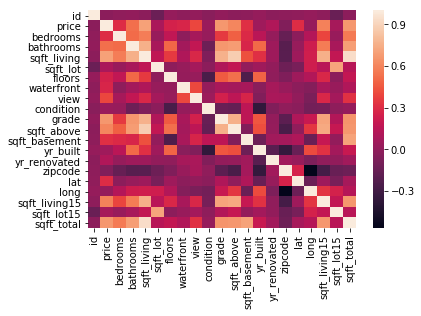

In [70]:
# Examine correlation via heatmap of price, grade, and total square feet for houses with more than 2400 sqft
sns.heatmap(df.corr());

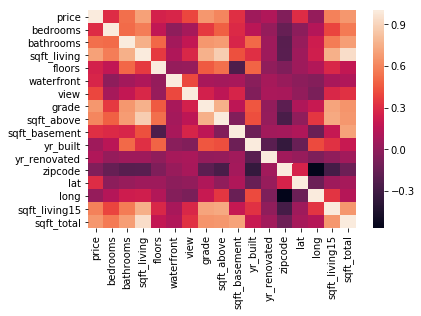

In [71]:
water = df.drop(columns=['id', 'sqft_lot', 'condition', 'sqft_lot15'])
sns.heatmap(water.corr());

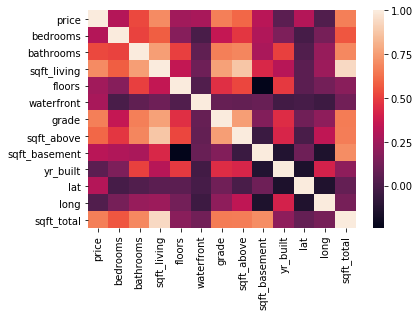

In [72]:
water = water.drop(columns=['view', 'yr_renovated', 'zipcode', 'sqft_living15'])
sns.heatmap(water.corr());

AxesSubplot(0.125,0.125;0.62x0.755)


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_total
price,1.000000,0.308787,0.525906,0.701917,0.256804,0.276295,0.667951,0.668185
bedrooms,0.308787,1.000000,0.514508,0.578212,0.177944,-0.002386,0.356563,0.562662
bathrooms,0.525906,0.514508,1.000000,0.755758,0.502582,0.067282,0.665838,0.694282
sqft_living,0.701917,0.578212,0.755758,1.000000,0.353953,0.110230,0.762779,0.941166
floors,0.256804,0.177944,0.502582,0.353953,1.000000,0.021883,0.458794,0.185904
waterfront,0.276295,-0.002386,0.067282,0.110230,0.021883,1.000000,0.087383,0.119061
grade,0.667951,0.356563,0.665838,0.762779,0.458794,0.087383,1.000000,0.657630
sqft_total,0.668185,0.562662,0.694282,0.941166,0.185904,0.119061,0.657630,1.000000


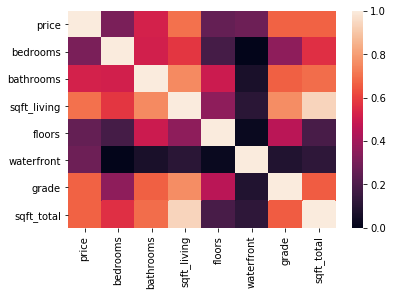

In [73]:
water = water.drop(columns=['lat', 'long', 'yr_built', 'sqft_basement', 'sqft_above'])

print(sns.heatmap(water.corr()));
water.corr()

# Little Correlation of Waterfront to Price
- As is evident from the correlation heatmap above, there is very little correlation of price relative to waterfront.  This could be because it is a boolean value that affects the results, but the likely factor is simply the small number of samples available that are waterfront properties.  This reinforces what we found above that while there is some factor that waterfront plays on price of a house, there are not enough pieces of evidence to back up this claim in this case.